In [14]:
# Projeto: Análise Estratégica de Vendas - E-commerce
# Autor: Lucas Viana
# Objetivo: Análise completa de performance de vendas para tomada de decisão estratégica
# Período: Dados simulados do primeiro semestre de 2024

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

print("INICIANDO ANÁLISE ESTRATÉGICA DE VENDAS")
print("=" * 40)

# Configuração de estilo
plt.style.use('default')
sns.set_palette("husl")

INICIANDO ANÁLISE ESTRATÉGICA DE VENDAS


In [15]:
# 1. SIMULAÇÃO DE DADOS

print("\nGERANDO BASE DE DADOS...")

np.random.seed(42)

produtos = ['Notebook Gamer', 'Mouse RGB', 'Teclado Mecânico', 'Monitor 24"', 'Headset Bluetooth']
categorias = ['Eletrônicos', 'Periféricos', 'Periféricos', 'Display', 'Áudio']

precos_base = {
    'Notebook Gamer': 3500,
    'Mouse RGB': 150,
    'Teclado Mecânico': 300,
    'Monitor 24"': 800,
    'Headset Bluetooth': 400
}

dados = {
    'Produto': np.random.choice(produtos, 200, p=[0.2, 0.25, 0.25, 0.15, 0.15]),
    'Categoria': [],
    'Preço': [],
    'Quantidade': np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], 200, p=[0.05, 0.1, 0.15, 0.2, 0.2, 0.15, 0.1, 0.04, 0.01]),
    'Mês': np.random.choice(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'], 200, p=[0.12, 0.15, 0.18, 0.2, 0.2, 0.15])
}

categoria_map = {
    'Notebook Gamer': 'Eletrônicos',
    'Mouse RGB': 'Periféricos',
    'Teclado Mecânico': 'Periféricos',
    'Monitor 24"': 'Display',
    'Headset Bluetooth': 'Áudio'
}


dados['Categoria'] = [categoria_map[prod] for prod in dados['Produto']]
dados['Preço'] = [precos_base[prod] * np.random.uniform(0.8, 1.2) for prod in dados['Produto']]

df = pd.DataFrame(dados)
df['Receita'] = df['Preço'] * df['Quantidade']
df['Custo'] = df['Preço'] * 0.6  # Simulando custo de 60% do preço
df['Lucro'] = df['Receita'] - df['Custo']
df['Margem'] = (df['Lucro'] / df['Receita']) * 100

print("Base de dados criada com sucesso!")
print(f"Total de registros: {len(df)}")
print(f"Período: Janeiro a Junho de 2024")


GERANDO BASE DE DADOS...
Base de dados criada com sucesso!
Total de registros: 200
Período: Janeiro a Junho de 2024


In [17]:
# 2. ANÁLISE EXPLORATÓRIA

print("\n" + "="*40)
print("ANÁLISE EXPLORATÓRIA COMPLETA")
print("="*40)

# Métricas principais
receita_total = df['Receita'].sum()
lucro_total = df['Lucro'].sum()
ticket_medio = df['Receita'].sum() / df['Quantidade'].sum()

print(f"\n MÉTRICAS PRINCIPAIS:")
print(f"   • Receita Total: R$ {receita_total:,.2f}")
print(f"   • Lucro Total: R$ {lucro_total:,.2f}")
print(f"   • Ticket Médio: R$ {ticket_medio:,.2f}")
print(f"   • Total de Vendas: {df['Quantidade'].sum():,} unidades")

# Análise por produto
print(f"\n TOP PERFORMERS POR RECEITA:")
receita_produto = df.groupby('Produto')['Receita'].sum().sort_values(ascending=False)
for produto, receita in receita_produto.items():
    participacao = (receita / receita_total) * 100
    print(f"   • {produto}: R$ {receita:,.2f} ({participacao:.1f}%)")

# Análise por categoria
print(f"\n PERFORMANCE POR CATEGORIA:")
receita_categoria = df.groupby('Categoria')['Receita'].sum().sort_values(ascending=False)
for categoria, receita in receita_categoria.items():
    participacao = (receita / receita_total) * 100
    print(f"   • {categoria}: R$ {receita:,.2f} ({participacao:.1f}%)")


ANÁLISE EXPLORATÓRIA COMPLETA

 MÉTRICAS PRINCIPAIS:
   • Receita Total: R$ 952,417.36
   • Lucro Total: R$ 823,102.45
   • Ticket Médio: R$ 1,053.56
   • Total de Vendas: 904 unidades

 TOP PERFORMERS POR RECEITA:
   • Notebook Gamer: R$ 695,261.42 (73.0%)
   • Monitor 24": R$ 111,052.44 (11.7%)
   • Teclado Mecânico: R$ 59,228.01 (6.2%)
   • Headset Bluetooth: R$ 51,612.43 (5.4%)
   • Mouse RGB: R$ 35,263.07 (3.7%)

 PERFORMANCE POR CATEGORIA:
   • Eletrônicos: R$ 695,261.42 (73.0%)
   • Display: R$ 111,052.44 (11.7%)
   • Periféricos: R$ 94,491.07 (9.9%)
   • Áudio: R$ 51,612.43 (5.4%)



GERANDO VISUALIZAÇÕES ESTRATÉGICAS
DASHBOARD ESTRATÉGICO DE VENDAS - 1º SEMESTRE 2024


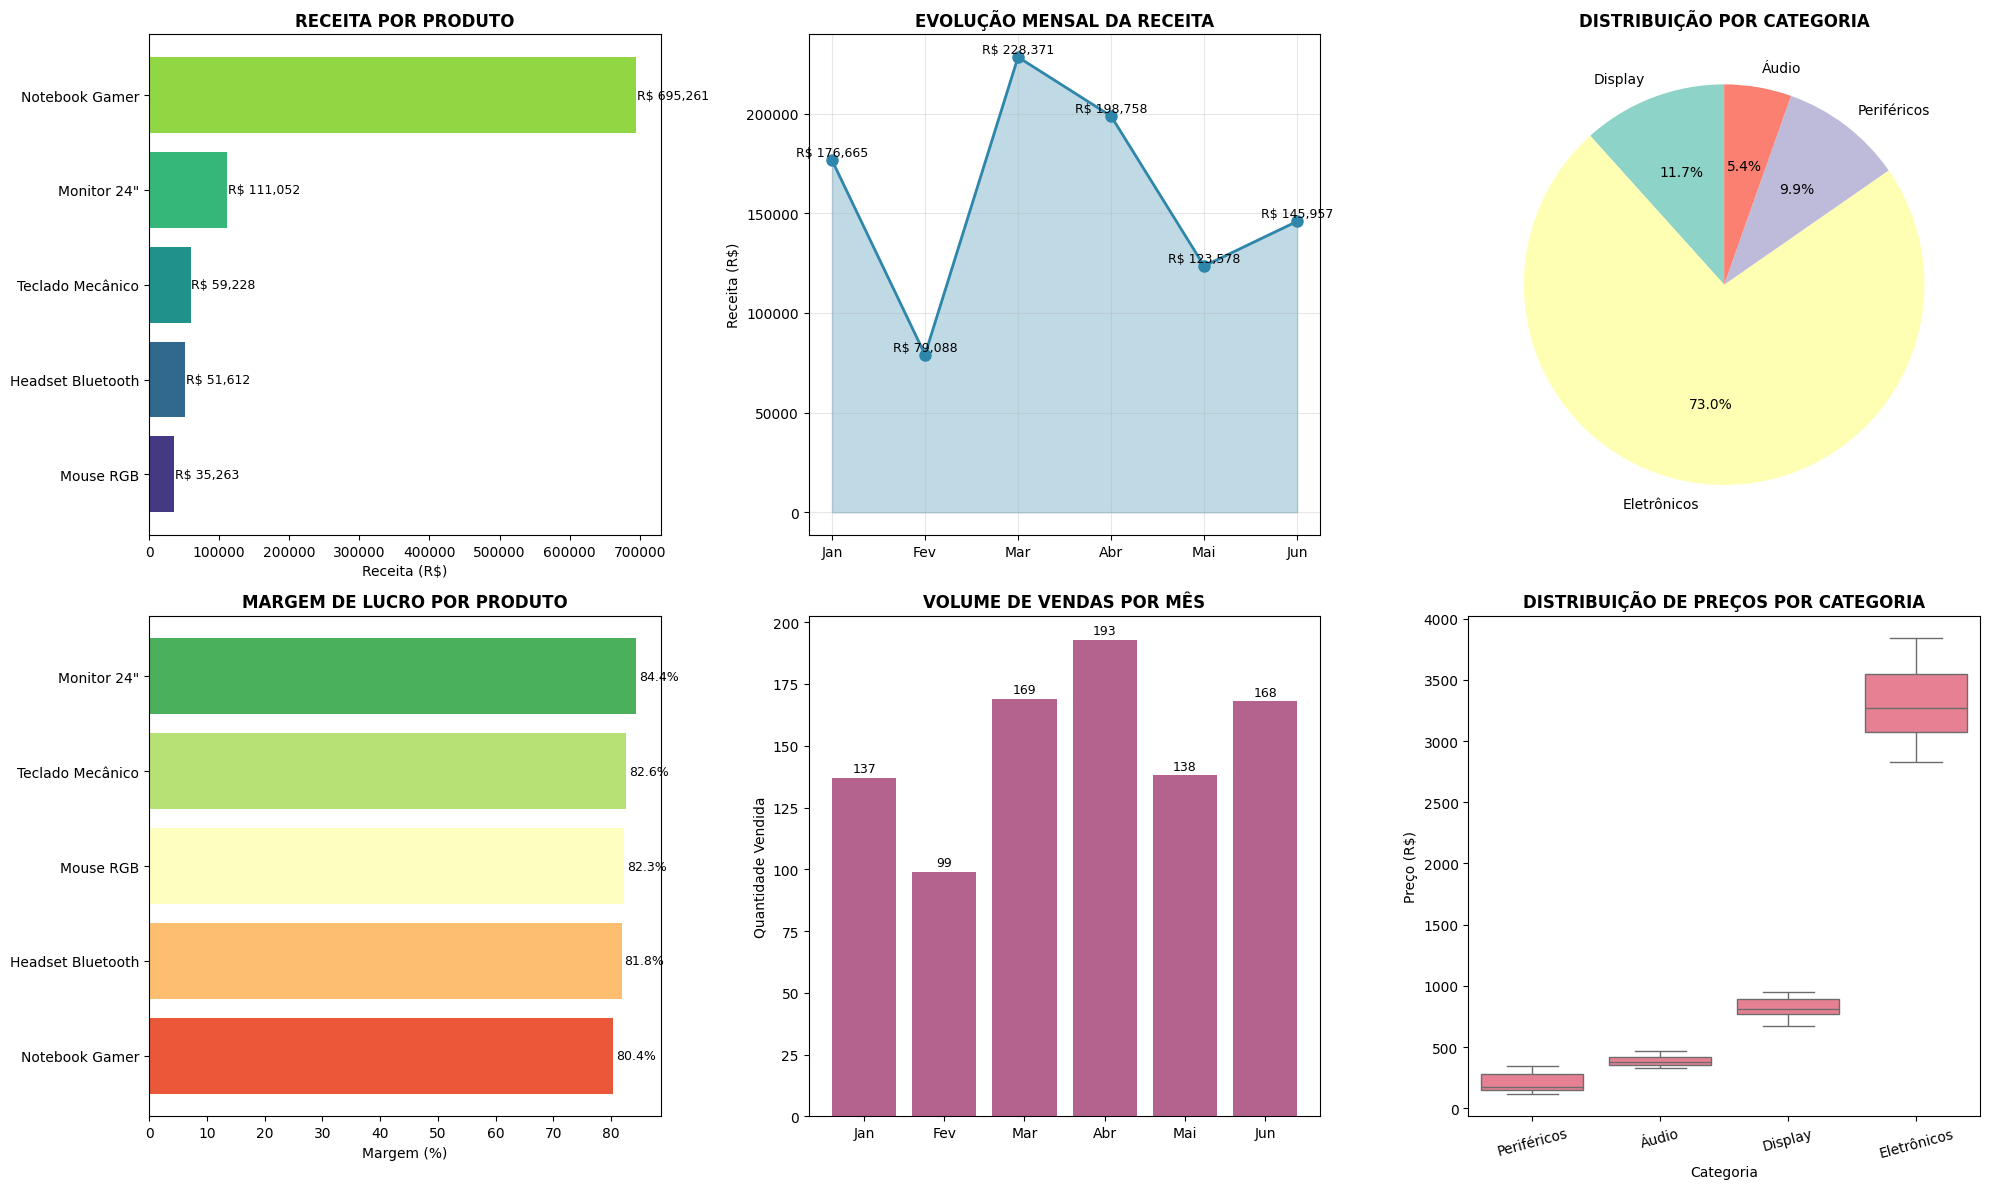

In [21]:
# 3. VISUALIZAÇÕES

print("\n" + "="*40)
print("GERANDO VISUALIZAÇÕES ESTRATÉGICAS")
print("="*40)
print("DASHBOARD ESTRATÉGICO DE VENDAS - 1º SEMESTRE 2024")
print("="*40)

# Configuração do layout dos gráficos
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Receita por Produto (Gráfico de Barras Horizontais)
receita_produto = df.groupby('Produto')['Receita'].sum().sort_values(ascending=True)
axes[0, 0].barh(range(len(receita_produto)), receita_produto.values, color=sns.color_palette("viridis", len(receita_produto)))
axes[0, 0].set_yticks(range(len(receita_produto)))
axes[0, 0].set_yticklabels(receita_produto.index)
axes[0, 0].set_title('RECEITA POR PRODUTO', fontweight='bold')
axes[0, 0].set_xlabel('Receita (R$)')

# Adicionar valores nas barras
for i, v in enumerate(receita_produto.values):
    axes[0, 0].text(v + 1000, i, f'R$ {v:,.0f}', va='center', fontsize=9)

# 2. Evolução Mensal da Receita
receita_mes = df.groupby('Mês')['Receita'].sum().reindex(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'])
axes[0, 1].plot(receita_mes.index, receita_mes.values, marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 1].fill_between(receita_mes.index, receita_mes.values, alpha=0.3, color='#2E86AB')
axes[0, 1].set_title('EVOLUÇÃO MENSAL DA RECEITA', fontweight='bold')
axes[0, 1].set_ylabel('Receita (R$)')
axes[0, 1].grid(True, alpha=0.3)

# Adicionar valores nos pontos
for i, v in enumerate(receita_mes.values):
    axes[0, 1].text(i, v + 2000, f'R$ {v:,.0f}', ha='center', fontsize=9)

# 3. Distribuição da Receita por Categoria
receita_categoria = df.groupby('Categoria')['Receita'].sum()
axes[0, 2].pie(receita_categoria.values, labels=receita_categoria.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("Set3"))
axes[0, 2].set_title('DISTRIBUIÇÃO POR CATEGORIA', fontweight='bold')

# 4. Margem de Lucro por Produto
margem_produto = df.groupby('Produto')['Margem'].mean().sort_values(ascending=True)
axes[1, 0].barh(range(len(margem_produto)), margem_produto.values, color=sns.color_palette("RdYlGn", len(margem_produto)))
axes[1, 0].set_yticks(range(len(margem_produto)))
axes[1, 0].set_yticklabels(margem_produto.index)
axes[1, 0].set_title('MARGEM DE LUCRO POR PRODUTO', fontweight='bold')
axes[1, 0].set_xlabel('Margem (%)')

# Adicionar valores nas barras
for i, v in enumerate(margem_produto.values):
    axes[1, 0].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

# 5. Volume de Vendas por Mês
vendas_mes = df.groupby('Mês')['Quantidade'].sum().reindex(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun'])
axes[1, 1].bar(vendas_mes.index, vendas_mes.values, color='#A23B72', alpha=0.8)
axes[1, 1].set_title('VOLUME DE VENDAS POR MÊS', fontweight='bold')
axes[1, 1].set_ylabel('Quantidade Vendida')

# Adicionar valores nas barras
for i, v in enumerate(vendas_mes.values):
    axes[1, 1].text(i, v + 1, f'{v:.0f}', ha='center', va='bottom', fontsize=9)

# 6. Boxplot - Distribuição de Preços por Categoria
df_boxplot = df.copy()
df_boxplot = df_boxplot[df_boxplot['Preço'] <= df_boxplot['Preço'].quantile(0.95)]
sns.boxplot(data=df_boxplot, x='Categoria', y='Preço', ax=axes[1, 2])
axes[1, 2].set_title('DISTRIBUIÇÃO DE PREÇOS POR CATEGORIA', fontweight='bold')
axes[1, 2].set_ylabel('Preço (R$)')
axes[1, 2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


ANÁLISE DE CORRELAÇÕES


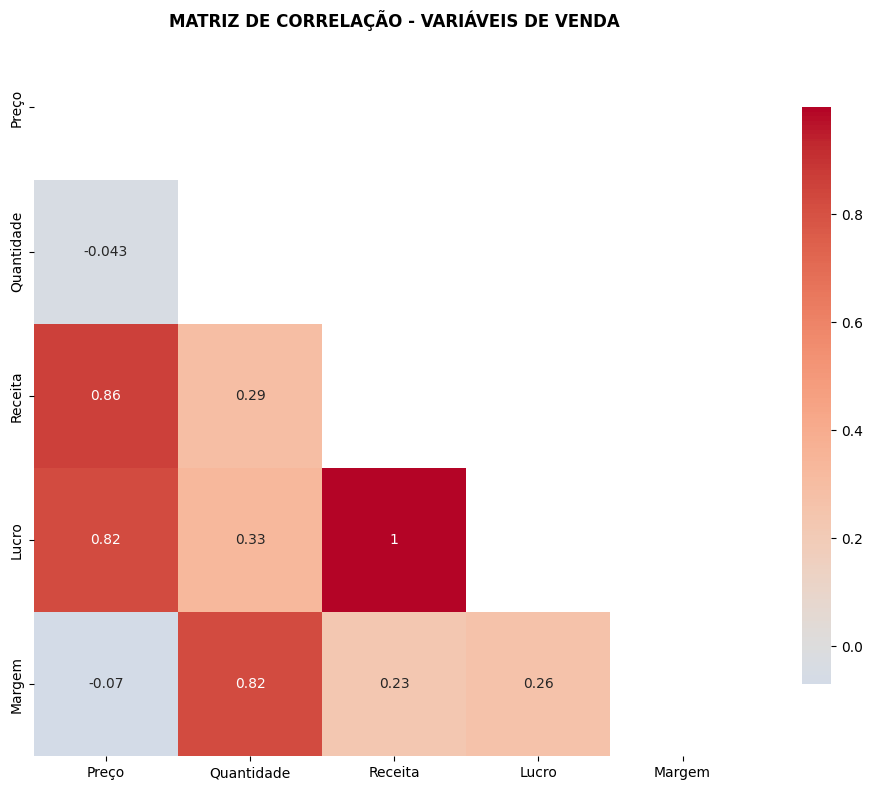


INSIGHTS DE CORRELAÇÃO:
   • Preço vs Quantidade: -0.043 (Fraca relação)
   • Preço vs Receita: 0.857 (Correlação positiva)


In [22]:
# 4. ANÁLISE DE CORRELAÇÃO

print("\n" + "="*50)
print("ANÁLISE DE CORRELAÇÕES")
print("="*50)

# Matriz de correlação
correlacao = df[['Preço', 'Quantidade', 'Receita', 'Lucro', 'Margem']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('MATRIZ DE CORRELAÇÃO - VARIÁVEIS DE VENDA', fontweight='bold')
plt.tight_layout()
plt.show()

# Insights de correlação
corr_preco_quantidade = correlacao.loc['Preço', 'Quantidade']
corr_preco_receita = correlacao.loc['Preço', 'Receita']

print(f"\nINSIGHTS DE CORRELAÇÃO:")
print(f"   • Preço vs Quantidade: {corr_preco_quantidade:.3f} ({'Forte' if abs(corr_preco_quantidade) > 0.5 else 'Fraca'} relação)")
print(f"   • Preço vs Receita: {corr_preco_receita:.3f} (Correlação {'positiva' if corr_preco_receita > 0 else 'negativa'})")



ANÁLISE ABC DE PRODUTOS

CLASSIFICAÇÃO ABC DOS PRODUTOS:
   • Notebook Gamer: Classe A (73.0% acumulado)
   • Monitor 24": Classe B (84.7% acumulado)
   • Teclado Mecânico: Classe B (90.9% acumulado)
   • Headset Bluetooth: Classe C (96.3% acumulado)
   • Mouse RGB: Classe C (100.0% acumulado)


<Figure size 1200x600 with 0 Axes>

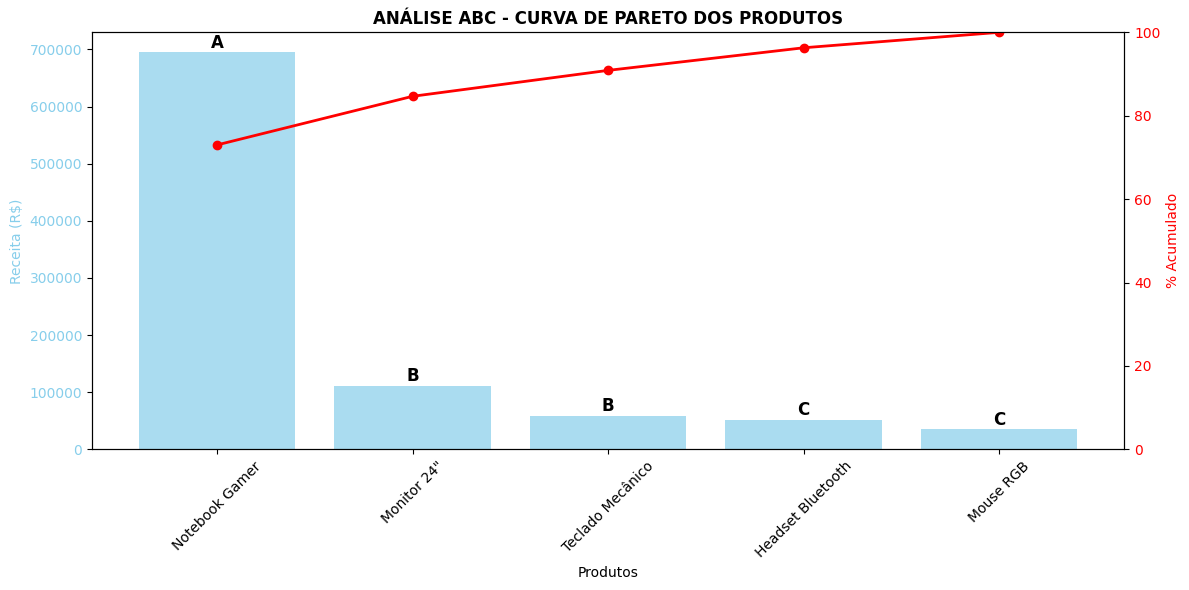

In [23]:
# 5. ANÁLISE ABC DE PRODUTOS

print("\n" + "="*50)
print("ANÁLISE ABC DE PRODUTOS")
print("="*50)

# Cálculo da análise ABC
analise_abc = df.groupby('Produto').agg({
    'Receita': 'sum',
    'Lucro': 'sum',
    'Quantidade': 'sum'
}).sort_values('Receita', ascending=False)

analise_abc['% Acumulado'] = (analise_abc['Receita'].cumsum() / analise_abc['Receita'].sum()) * 100
analise_abc['Classificação'] = pd.cut(analise_abc['% Acumulado'],
                                     bins=[0, 80, 95, 100],
                                     labels=['A', 'B', 'C'])

print("\nCLASSIFICAÇÃO ABC DOS PRODUTOS:")
for produto, row in analise_abc.iterrows():
    print(f"   • {produto}: Classe {row['Classificação']} ({row['% Acumulado']:.1f}% acumulado)")

# Visualização da análise ABC
plt.figure(figsize=(12, 6))

# Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras da receita
bars = ax1.bar(range(len(analise_abc)), analise_abc['Receita'], color='skyblue', alpha=0.7)
ax1.set_xlabel('Produtos')
ax1.set_ylabel('Receita (R$)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Linha de percentual acumulado
ax2 = ax1.twinx()
ax2.plot(range(len(analise_abc)), analise_abc['% Acumulado'], color='red', marker='o', linewidth=2)
ax2.set_ylabel('% Acumulado', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Configurações do gráfico
ax1.set_xticks(range(len(analise_abc)))
ax1.set_xticklabels(analise_abc.index, rotation=45)
plt.title('ANÁLISE ABC - CURVA DE PARETO DOS PRODUTOS', fontweight='bold')

# Adicionar classificações
for i, classif in enumerate(analise_abc['Classificação']):
    ax1.text(i, analise_abc['Receita'].iloc[i] + 1000, classif,
             ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()


In [24]:
# 6. INSIGHTS E RECOMENDAÇÕES ESTRATÉGICAS

print("\n" + "="*50)
print("INSIGHTS E RECOMENDAÇÕES ESTRATÉGICAS")
print("="*50)

# Produto com maior receita
produto_top_receita = receita_produto.index[0]
receita_top = receita_produto.iloc[0]

# Produto com maior margem
produto_top_margem = margem_produto.index[-1]
margem_top = margem_produto.iloc[-1]

# Categoria dominante
categoria_top = receita_categoria.index[0]

# Mês de melhor performance
mes_top = receita_mes.idxmax()
receita_mes_top = receita_mes.max()

print(f"\nPRINCIPAIS DESCOBERTAS:")
print(f"   • Produto Estrela: {produto_top_receita} (R$ {receita_top:,.2f})")
print(f"   • Maior Margem: {produto_top_margem} ({margem_top:.1f}%)")
print(f"   • Categoria Líder: {categoria_top}")
print(f"   • Mês de Pico: {mes_top} (R$ {receita_mes_top:,.2f})")

print(f"\nRECOMENDAÇÕES ESTRATÉGICAS:")
print(f"     1. OTIMIZAÇÃO DE ESTOQUE:")
print(f"      • Focar em {produto_top_receita} (Classe A)")
print(f"      • Manter estoque estratégico de {categoria_top}")

print(f"\n   2. ESTRATÉGIAS DE MARKETING:")
print(f"      • Promover {produto_top_margem} (alta margem)")
print(f"      • Campanhas específicas para {categoria_top}")

print(f"\n   3. GESTÃO DE PREÇOS:")
print(f"      • Revisar preços dos produtos Classe C")
print(f"      • Bundles: {produto_top_receita} + acessórios")

print(f"\n   4. PLANEJAMENTO SAZONAL:")
print(f"      • Preparar para pico em {mes_top}")
print(f"      • Planejar promoções pós-pico")

print(f"\n   5. PRÓXIMOS PASSOS:")
print(f"      • Análise de sazonalidade detalhada")
print(f"      • Pesquisa de satisfação do cliente")
print(f"      • Análise de concorrência por categoria")


INSIGHTS E RECOMENDAÇÕES ESTRATÉGICAS

PRINCIPAIS DESCOBERTAS:
   • Produto Estrela: Mouse RGB (R$ 35,263.07)
   • Maior Margem: Monitor 24" (84.4%)
   • Categoria Líder: Display
   • Mês de Pico: Mar (R$ 228,370.69)

RECOMENDAÇÕES ESTRATÉGICAS:
     1. OTIMIZAÇÃO DE ESTOQUE:
      • Focar em Mouse RGB (Classe A)
      • Manter estoque estratégico de Display

   2. ESTRATÉGIAS DE MARKETING:
      • Promover Monitor 24" (alta margem)
      • Campanhas específicas para Display

   3. GESTÃO DE PREÇOS:
      • Revisar preços dos produtos Classe C
      • Bundles: Mouse RGB + acessórios

   4. PLANEJAMENTO SAZONAL:
      • Preparar para pico em Mar
      • Planejar promoções pós-pico

   5. PRÓXIMOS PASSOS:
      • Análise de sazonalidade detalhada
      • Pesquisa de satisfação do cliente
      • Análise de concorrência por categoria
